In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [2]:
# Definimos estados y priors
States = np.array([0,1]) # Deben ser enteros 
Prior =  np.array([0.4,0.6])

In [3]:
# Definimos matrices de emisión y transmision
T = np.array([[0.7,0.5],[0.3,0.5]])

E = np.array([[0.8,0.2],[0.1,0.3],[0.1,0.5]])

#np.sum(T,axis=0)

In [4]:
DictH = {0:'Feliz',1:'Triste'}
DictH[0]

'Feliz'

In [5]:
DictO = {0:'Rojo',1:'Verde',2:'Azul'}
DictO[1]

'Verde'

In [6]:
Obs = np.array([1,2,0])

In [13]:
def GetHiddenStates(States, N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
    
    print(CStates)
    return np.array(Permu)

In [14]:
HiddenStates = GetHiddenStates(States,3)

[(0, 0, 0), (0, 0, 1), (0, 1, 1), (1, 1, 1)]


In [15]:
HiddenStates

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [21]:
print(Obs)

[1 2 0]


In [38]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0] ]
    
    for i in range(n-1):
        p *= T[ State[i+1], State[i] ]
    
    
    
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    #print(p, State)
    
    return p

In [39]:
dim = HiddenStates.shape[0]
P = np.zeros(dim)

for i in range(dim):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
    
print(P)

[0.001568 0.000168 0.0024   0.00504  0.0006   0.00054  0.018    0.0045  ]


In [40]:
PObs = np.sum(P)
print(PObs)

0.032816


In [41]:
maxP = np.max(P)
ii = np.where( P == np.amax(P))
print(HiddenStates[ii],maxP)

[[1 1 0]] 0.018


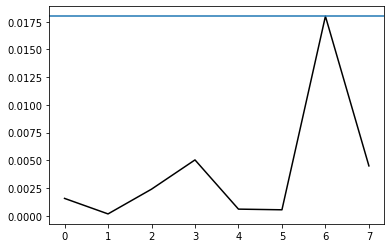

In [42]:
plt.plot(P,color='k')
plt.axhline(y=maxP)

In [43]:
ObsStates = GetHiddenStates([0,1,2],3)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 1), (0, 1, 2), (0, 2, 2), (1, 1, 1), (1, 1, 2), (1, 2, 2), (2, 2, 2)]


In [44]:
NObs = ObsStates.shape[0]

PObs = np.zeros(NObs)

for j in range(NObs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)

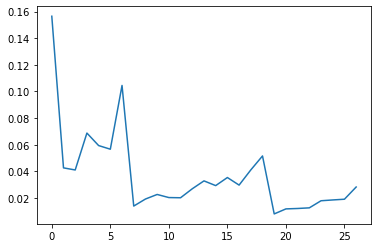

In [45]:
plt.plot(PObs)

In [46]:
maxP = np.max(PObs)
ii = np.where( PObs == np.amax(PObs))
print(ObsStates[ii],maxP)

[[0 0 0]] 0.15646400000000002


In [47]:
np.sum(PObs)

1.0